# Module 7: Machine Learning Project  
Author: Kellie Leopold  
Date: February 25th, 2025  
GitHub Link: [Module 7 Repository](https://github.com/kjleopold/datafun-07-ml)

### Imports
The below script contains all the imports needed for this project.

In [490]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Part 1 - Chart a Straight Line
***
Follow the instructions from 10.16 *Intro to Data Science: Time Series and Simple Linear Regression* from Intro to Python textbook.

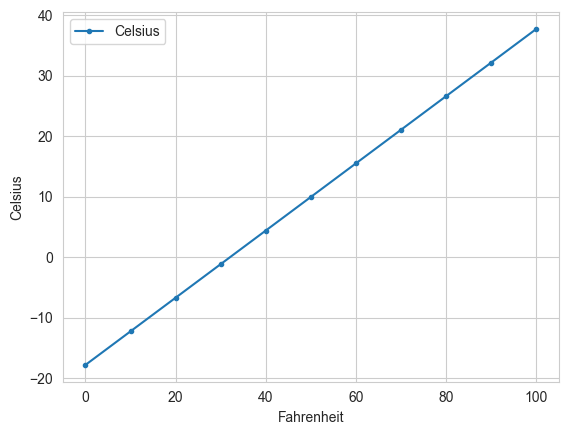

In [491]:
# Plot Celsius vs Fahrenheit using pandas DataFrame
c = lambda f: 5/9*(f-32)
temps = [(f,c(f)) for f in range (0,101,10)]

# Graph the linear relationship between Fahrenheit and Celsius
temps_df = pd.DataFrame(temps,columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction
***
Use Linear Regression on Average High Temperatures in NYC in January dataset to make prediction.

### Section 1 - Data Acquisition
Load NYC **January high temperature** from a csv file into a DataFrame:

In [492]:
# Load and display the New York City data
nyc_df=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Inspect the DataFrame's **head** and **tail** to get a sense of the data:

In [493]:
# Inspect head
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [494]:
# Inspect tail
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
**Clean** the data by improving column names and cleaning up the data series.

In [495]:
# Rename the 'Value' column as 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Inspect first three rows of data
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [496]:
# To improve the readability of the x-axis labels, remove 01 (January).
# Display data type in Date column
nyc_df.Date.dtype

dtype('int64')

In [497]:
# Divide by 10 to truncate the last two digits (use floordiv)
nyc_df.Date = nyc_df.Date.floordiv(100)

# Inspect first three rows of data
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
* Set the display precision to 2 decimal places and use **'display.precision'** instead of 'precision'.  
* Use **describe**() to calculate basic descriptive statistics. 

In [498]:
# Set decimal to 2 places
pd.set_option('display.precision',2)

# Use describe() to calculate basic stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
* Use the SciPy **stats** module **linregress** function to calculate **slope and intercept** for the best fit line through the data.
* Add all imports to the top of the file.

In [499]:
# Calculate a regression line's slope and intercept
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

# Display slope
print(linear_regression.slope)

0.014771361132966163


In [500]:
# Display intercept
print(linear_regression.intercept)

8.694993233674289


### Section 6 - Predict
Use the model to **predict** the average high temp in Jan for the 2024.

In [501]:
# Predict avg high temp in Jan 2024
print(linear_regression.slope * 2024 + linear_regression.intercept)

38.5922281667978


### Section 7 - Visualizations
* Use Seaborn to generate a scatter plot with a best fit line.
* Set the axes and the y scale as directed in the textbook.

(10.0, 70.0)

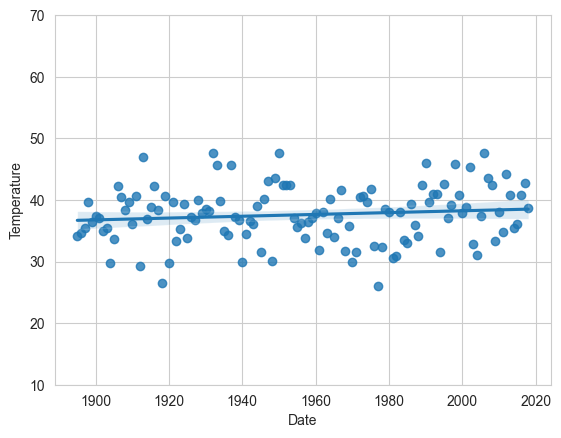

In [502]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

## Part 3 - Prediction
***
Use Linear Regression on Average High Temperatures in NYC in January using scikit-learn estimator.

### Section 1 - Build the Model
* Use **test_train_split** to split the data into parts for training and testing.
* Check the **shape** of each data set.
* Train the model using **Linear Regresson Fit**.
* View the returned **coef_** and **intercept_** attributes needed for the line equation (y= mx + b).


In [503]:
# Use train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values,
        random_state=11)

# Check the shape of x_train and x_test
print(X_train.shape, X_test.shape)


(93, 1) (31, 1)


In [504]:
# Train the model using LinearRegression estimator
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# Get the slope from the estimator's coeff_ attribute
print(linear_regression.coef_)

# Get the intercept from the estimator's intercept_ attribute
print(linear_regression.intercept_)

[0.01939167]
-0.30779820252656975


### Section 2 - Test the Model

In [505]:
# Use the data in X_test to test the model
predicted = linear_regression.predict(X_test)
expected = y_test

# Display the predicted and expected values (every 5th element)
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict
Use the model to **predict** the average high temp in Jan for the 2024.

In [506]:
# Predict avg high temp in Jan 2024
predict = (lambda x: linear_regression.coef_ * x + 
           linear_regression.intercept_)
predict(2024)

array([38.94094855])